In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [3]:
data=pd.read_csv("Color.txt", sep="\t")

In [4]:
data.isnull().sum(axis=0)

X1    0
X2    0
X3    0
Y     0
dtype: int64

In [5]:
#Removing duplicates lowers error quite a bit

#Looks like most of the colors on the RGB scale repeat, logically. Also, 
#11 of them were labels with both one and 2, which is not desirable. Just removed them from the second label,
data.drop_duplicates(inplace=True)
#11 of them were labels with both one and 2, which is not desirable. Just removed them from both labels,
#As is was a small data set
data.drop_duplicates(subset=['X1','X2','X3'],keep=False,inplace=True)

In [6]:
data=np.matrix(data)

In [7]:
rows, cols=np.where(data[:,3]==1)
rows2,cols2=np.where(data[:,3]==2)

In [8]:
len(rows)

14643

In [9]:
ratio=1-(data[rows,:-1].shape[0]/data[rows2,:-1].shape[0])

<IPython.core.display.Javascript object>


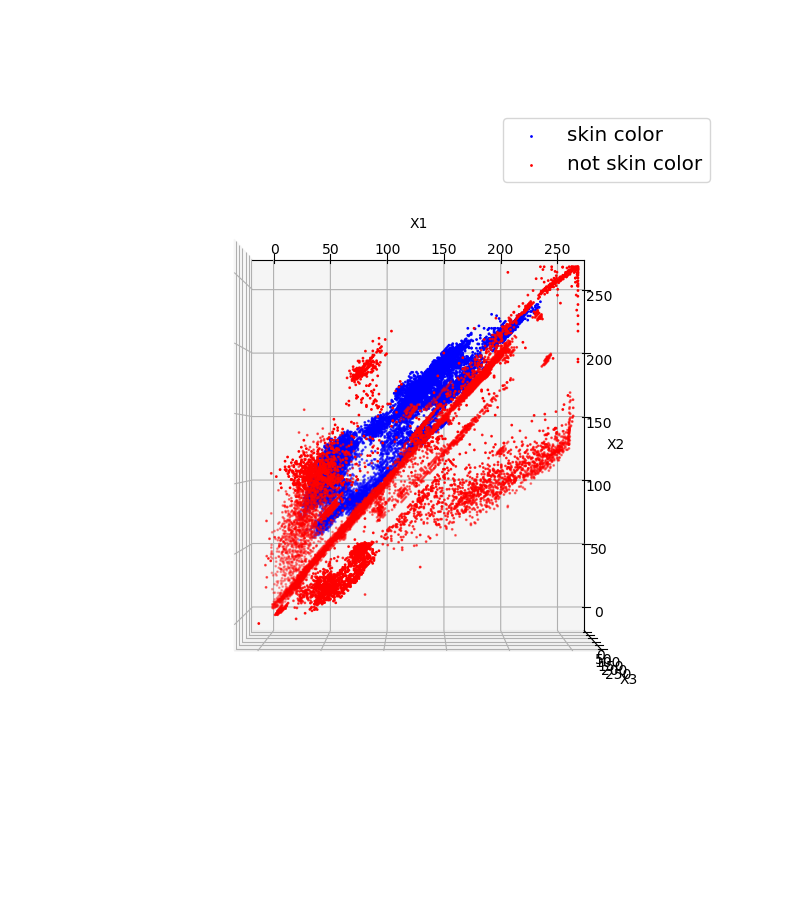

In [10]:
%matplotlib notebook
fig = plt.figure(figsize=(8,9))
ax = fig.add_subplot(111, projection='3d')

zeros=data[rows,:]
ones=data[rows2,:]

ax.scatter(zeros[:10000,0],zeros[:10000,1],zeros[:10000,2],s=1, color="blue", label="skin color")
ax.scatter(ones[:10000,0],ones[:10000,1],ones[:10000,2],s=1, color="red", label="not skin color")

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.legend(fontsize="x-large")

In [12]:
#Min max normalize
#X is data set to normalize, X_tr is data set to normalize based on
def norm(X,X_tr):
    X_tr_min=X_tr.min(0)
    X_tr_max=X_tr.max(0)
    X=(X-X_tr_min)/(X_tr_max-X_tr_min)
    return(X)

In [13]:
#Just a test of normalizer, doing min max
norm(data,data)

matrix([[0.29019608, 0.33333333, 0.48235294, 0.        ],
        [0.28627451, 0.32941176, 0.47843137, 0.        ],
        [0.28235294, 0.3254902 , 0.4745098 , 0.        ],
        ...,
        [0.24313725, 0.25098039, 0.1372549 , 1.        ],
        [0.22745098, 0.23921569, 0.11372549, 1.        ],
        [0.40392157, 0.41568627, 0.2       , 1.        ]])

In [14]:
#Shuffle data
np.random.shuffle(data)

In [15]:
k=10

In [16]:
data_sets=np.array_split(data,k)

In [17]:
epochs=500
eta=.00005
accuracy=[]
for j in range(k):
    test=data_sets[j]
    train=np.vstack(data_sets[:j]+data_sets[(j+1):])
    #make sure to normalize test data first, based on train. Add column of ones
    X_test=norm(test[:,:-1],train[:,:-1])
    X_test=np.hstack((np.ones((X_test.shape[0],1)),X_test))
    y_test=norm(test[:,-1],train[:,-1])

    #normalize train and add bias column
    X_train=norm(train[:,:-1],train[:,:-1])
    X_train=np.hstack((np.ones((X_train.shape[0],1)),X_train))
    y_train=norm(train[:,-1],train[:,-1])
    #initialize weights for each fold
    w=np.random.randn(4,1)
    for i in range(epochs):
        p=1/(1+np.exp(-X_train@w))
        w=w-eta*X_train.T@(p-y_train)
    p_test=1/(1+np.exp(-X_test@w))
    y_pred=np.rint(p_test)
    accuracy.append((y_pred == y_test).mean()*100)
    

In [18]:
np.mean(accuracy)

79.20150328379637

In [19]:
accuracy

[79.03947112580207,
 79.66167606455376,
 78.99649941656943,
 80.22170361726954,
 79.65772073123298,
 78.78257487359004,
 79.11318553092183,
 78.02411513029949,
 79.4437961882536,
 79.07429015947103]

In [20]:
ratio

0.601865194812257

In [21]:
#Make sure that it can predict both 0s and 1s
min(y_pred)

matrix([[0.]])

In [22]:
w[1,0]

3.032593463101572

In [23]:
x = y = np.arange(0.0,1.0, 0.05)
X, Y = np.meshgrid(x, y)
Z=-(w[0,0]+X*w[1,0]+ Y*w[2,0])/w[3,0]

In [24]:
rows, cols=np.where(y_train[:,0]==0)
rows2,cols2=np.where(y_train[:,0]==1)
X_zeros=X_train[rows,:]
X_ones=X_train[rows2,:]
np.random.shuffle(X_zeros)
np.random.shuffle(X_ones)

<IPython.core.display.Javascript object>


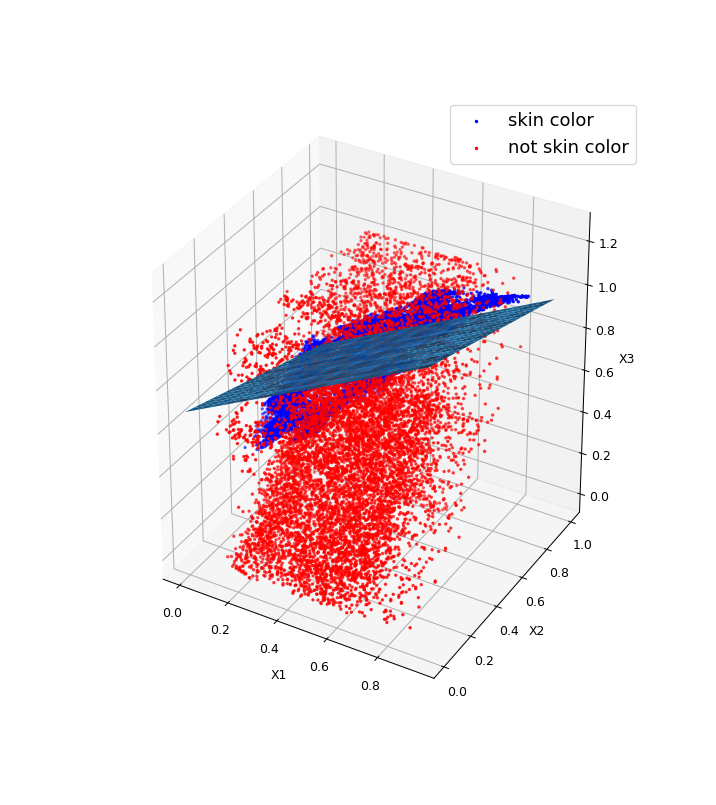

In [29]:
%matplotlib notebook
fig = plt.figure(figsize=(8,9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_zeros[1:10000,1],X_zeros[1:10000,2],X_zeros[1:10000,3],s=3, color="blue", label="skin color")
ax.scatter(X_zeros[1:10000,1],X_ones[1:10000,2],X_ones[1:10000,3],s=3, color="red", label="not skin color")
ax.plot_surface(X, Y, Z)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')
ax.legend(fontsize="x-large")

In [418]:
X_train

matrix([[1.        , 0.52941176, 0.61568627, 0.89803922],
        [1.        , 0.54509804, 0.69803922, 0.8745098 ],
        [1.        , 0.15294118, 0.36078431, 0.58431373],
        ...,
        [1.        , 0.07843137, 0.06666667, 0.00784314],
        [1.        , 0.2       , 0.20392157, 0.07058824],
        [1.        , 1.        , 0.        , 1.        ]])